<a href="https://colab.research.google.com/github/sudhakarmlal/EVA/blob/master/CNN_R8_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2

In [0]:
import numpy as np # MATRIX OPERATIONS
import pandas as pd # EFFICIENT DATA STRUCTURES
import matplotlib.pyplot as plt # GRAPHING AND VISUALIZATIONS
import math # MATHEMATICAL OPERATIONS
import cv2 # IMAGE PROCESSING - OPENCV
from glob import glob # FILE OPERATIONS
import itertools

# KERAS AND SKLEARN MODULES
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# GLOBAL VARIABLES
scale = 70
seed = 7

Using TensorFlow backend.


In [0]:
path_to_images = './train/*/*.png'
images = glob(path_to_images)
trainingset = []
traininglabels = []
num = len(images)
print(num)
count = 1
#READING IMAGES AND RESIZING THEM
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    trainingset.append(cv2.resize(cv2.imread(i),(scale,scale)))
    traininglabels.append(i.split('\\')[1])
    count=count+1
trainingset = np.asarray(trainingset)
print(traininglabels)
traininglabels = pd.DataFrame(traininglabels)

4750
['Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Bla

In [0]:
traininglabels[0]

0       Black-grass
1       Black-grass
2       Black-grass
3       Black-grass
4       Black-grass
5       Black-grass
6       Black-grass
7       Black-grass
8       Black-grass
9       Black-grass
10      Black-grass
11      Black-grass
12      Black-grass
13      Black-grass
14      Black-grass
15      Black-grass
16      Black-grass
17      Black-grass
18      Black-grass
19      Black-grass
20      Black-grass
21      Black-grass
22      Black-grass
23      Black-grass
24      Black-grass
25      Black-grass
26      Black-grass
27      Black-grass
28      Black-grass
29      Black-grass
           ...     
4720     Sugar beet
4721     Sugar beet
4722     Sugar beet
4723     Sugar beet
4724     Sugar beet
4725     Sugar beet
4726     Sugar beet
4727     Sugar beet
4728     Sugar beet
4729     Sugar beet
4730     Sugar beet
4731     Sugar beet
4732     Sugar beet
4733     Sugar beet
4734     Sugar beet
4735     Sugar beet
4736     Sugar beet
4737     Sugar beet
4738     Sugar beet


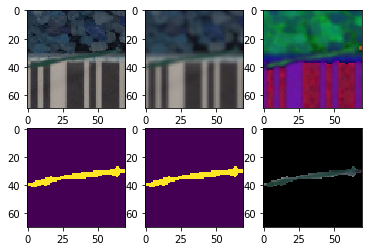

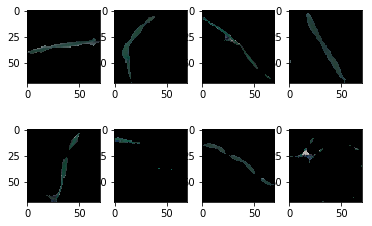

In [0]:
new_train = []
sets = []; getEx = True
for i in trainingset:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    new = np.zeros_like(i,np.uint8)
    new[boolean] = i[boolean]
    new_train.append(new)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i) # ORIGINAL
        plt.subplot(2,3,2);plt.imshow(blurr) # BLURRED
        plt.subplot(2,3,3);plt.imshow(hsv) # HSV CONVERTED
        plt.subplot(2,3,4);plt.imshow(mask) # MASKED
        plt.subplot(2,3,5);plt.imshow(boolean) # BOOLEAN MASKED
        plt.subplot(2,3,6);plt.imshow(new) # NEW PROCESSED IMAGE
        plt.show()
        getEx = False
new_train = np.asarray(new_train)

# CLEANED IMAGES
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(new_train[i])

In [0]:
labels = preprocessing.LabelEncoder()
labels.fit(traininglabels[0])
print('Classes'+str(labels.classes_))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


12


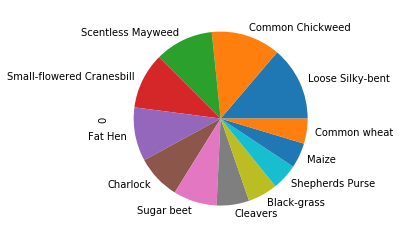

In [0]:

encodedlabels = labels.transform(traininglabels[0])
clearalllabels = np_utils.to_categorical(encodedlabels)
classes = clearalllabels.shape[1]
print(str(classes))
traininglabels[0].value_counts().plot(kind='pie')

In [0]:
new_train = new_train/255
x_train,x_test,y_train,y_test = train_test_split(new_train,clearalllabels,test_size=0.1,random_state=seed,stratify=clearalllabels)

In [0]:
generator = ImageDataGenerator(rotation_range = 180,zoom_range = 0.1,width_shift_range = 0.1,height_shift_range = 0.1,horizontal_flip = True,vertical_flip = True)
generator.fit(x_train)

In [0]:
np.random.seed(seed)

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)  

In [0]:
model.fit(x_train,y_train,batch_size=200,nb_epoch=15,verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.


C:\Users\desatapa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 4275 samples, validate on 475 samples
Epoch 1/15
4275/4275 [==============================] - 544s 127ms/step - loss: 2.5893 - acc: 0.2749 - val_loss: 7.3195 - val_acc: 0.1705
Epoch 2/15
4275/4275 [==============================] - 540s 126ms/step - loss: 1.7248 - acc: 0.4599 - val_loss: 5.2122 - val_acc: 0.2947
Epoch 3/15
4275/4275 [==============================] - 612s 143ms/step - loss: 1.3881 - acc: 0.5406 - val_loss: 1.5678 - val_acc: 0.5432
Epoch 4/15
4275/4275 [==============================] - 769s 180ms/step - loss: 1.1998 - acc: 0.5937 - val_loss: 2.7318 - val_acc: 0.4442
Epoch 5/15
4275/4275 [==============================] - 645s 151ms/step - loss: 1.0602 - acc: 0.6421 - val_loss: 1.8537 - val_acc: 0.5411
Epoch 6/15
4275/4275 [==============================] - 703s 164ms/step - loss: 0.8843 - acc: 0.6973 - val_loss: 1.3747 - val_acc: 0.6147
Epoch 7/15
4275/4275 [==============================] - 616s 144ms/step - loss: 0.7779 - acc: 0.7364 - val_loss: 1.9821 - val

In [0]:
score=model.evaluate(x_test,y_test)

475/475 [==============================] - 18s 37ms/step


In [0]:
score

[0.961871243778028, 0.7515789472429376]

In [0]:
y_predict = model.predict(x_test)

In [0]:
print(model.evaluate(x_train, y_train))  # Evaluate on train set
print(model.evaluate(x_test, y_test))  # Evaluate on test set

4275/4275 [==============================] - 161s 38ms/step
[0.7080882285491765, 0.8067836258564776]
475/475 [==============================] - 17s 35ms/step
[0.961871243778028, 0.7515789472429376]


In [0]:
y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[ 1  0  0  0  0  0 23  1  1  0  0  0]
 [ 0 34  1  0  0  1  0  2  1  0  0  0]
 [ 0  2 23  0  1  0  0  0  0  0  0  3]
 [ 0  0  0 55  0  0  0  0  2  1  2  1]
 [ 0  0  0  0 11  0 11  0  0  0  0  0]
 [ 0  0  0  3  1 35  4  0  1  0  0  3]
 [ 0  0  0  0  0  0 65  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 20  0  0  0  1]
 [ 0  1  0  3  0  0  1  2 44  0  0  1]
 [ 0  0  0  4  0  0  0  0  5 11  3  0]
 [ 0  4  0  9  0  0  0  0  0  0 30  7]
 [ 0  1  0  7  0  1  0  0  2  0  0 28]]


In [0]:
path_to_test = './test/*.png'
pics = glob(path_to_test)

testimages = []
tests = []
count=1
num = len(pics)

for i in pics:
    print(str(count)+'/'+str(num),end='\r')
    tests.append(i.split('/')[-1])
    testimages.append(cv2.resize(cv2.imread(i),(scale,scale)))
    count = count + 1

testimages = np.asarray(testimages)

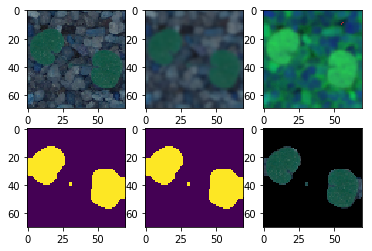

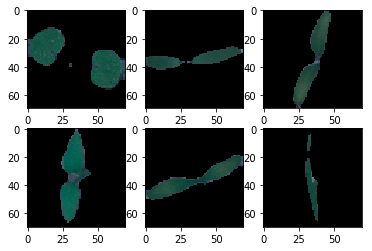

In [0]:
newtestimages = []
sets = []
getEx = True
for i in testimages:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    hsv = cv2.cvtColor(blurr,cv2.COLOR_BGR2HSV)
    
    lower = (25,40,50)
    upper = (75,255,255)
    mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
    mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
    boolean = mask>0
    masking = np.zeros_like(i,np.uint8)
    masking[boolean] = i[boolean]
    newtestimages.append(masking)
    
    if getEx:
        plt.subplot(2,3,1);plt.imshow(i)
        plt.subplot(2,3,2);plt.imshow(blurr)
        plt.subplot(2,3,3);plt.imshow(hsv)
        plt.subplot(2,3,4);plt.imshow(mask)
        plt.subplot(2,3,5);plt.imshow(boolean)
        plt.subplot(2,3,6);plt.imshow(masking)
        plt.show()
        getEx=False
        
newtestimages = np.asarray(newtestimages)
# OTHER MASKED IMAGES
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(newtestimages[i])

In [0]:
newtestimages=newtestimages/255
prediction = model.predict(newtestimages)
# PREDICTION TO A CSV FILE
pred = np.argmax(prediction,axis=1)
predStr = labels.classes_[pred]
result = {'file':tests,'species':predStr}
result = pd.DataFrame(result)
result.to_csv("Prediction.csv",index=False)